# **KNN ALGORITHM**










In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris= load_iris()

In [9]:
type(iris)

sklearn.utils.Bunch

In [10]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


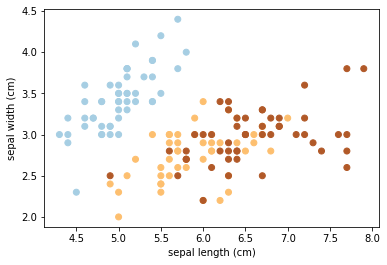

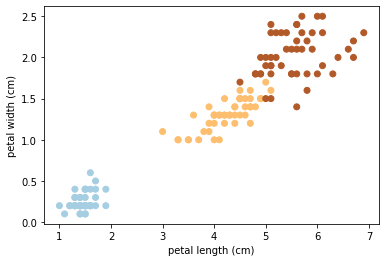

In [14]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

plt.scatter(iris.data[:,2],iris.data[:,3],c=iris.target, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

In [15]:
p = iris.data
q = iris.target
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names,["target"])
df = pd.DataFrame(data,columns=columns)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [33]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


[]

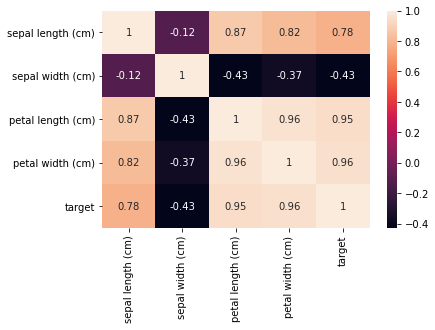

In [38]:
sns.heatmap(df.corr(),annot=True)
plt.plot()

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

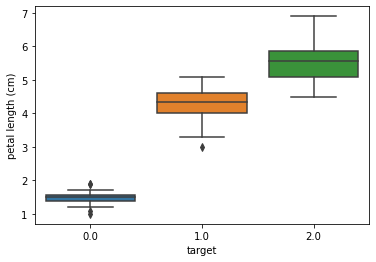

In [18]:
sns.boxplot(x="target",y="petal length (cm)",data=df)

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

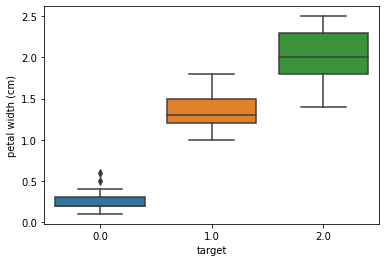

In [19]:
sns.boxplot(x="target",y="petal width (cm)",data=df)

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

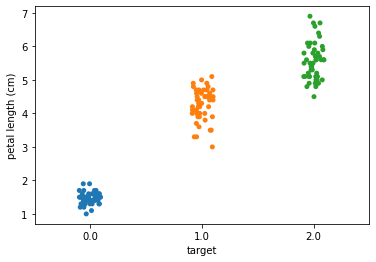

In [40]:
sns.stripplot(x="target", y="petal length (cm)", data=df)

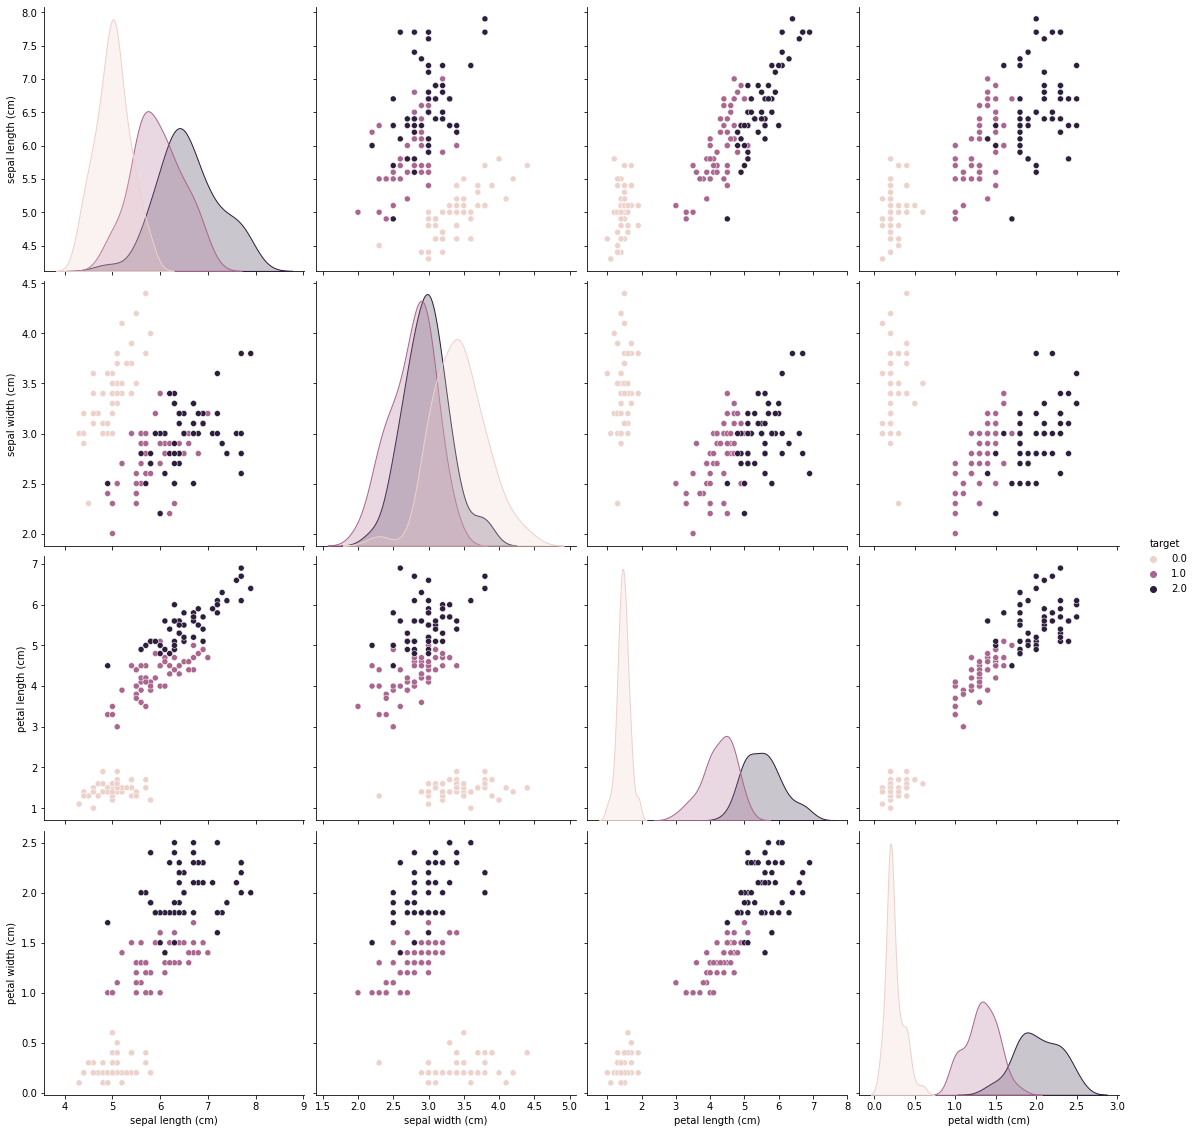

In [43]:
sns.pairplot(df, hue="target", height=4)

In [22]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test = train_test_split(p,q,test_size=0.2,random_state=4)
print(p_train.shape)
print(p_test.shape)
print(q_train.shape)
print(q_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26)
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(p_train,q_train)
        q_pred=knn.predict(p_test)
        scores_list.append(metrics.accuracy_score(q_test,q_pred))

Text(0, 0.5, 'Accuracy on dataset')

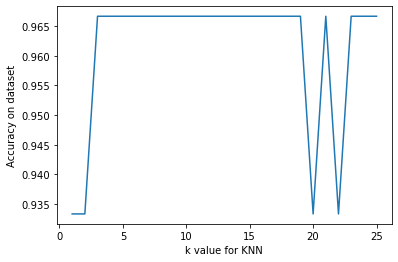

In [26]:
plt.plot(k_range,scores_list)
plt.xlabel('k value for KNN')
plt.ylabel('Accuracy on dataset')

In [27]:
from sklearn.model_selection import cross_val_score
scores={}
cv_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores[k]=cross_val_score(knn,p_train,q_train,cv=10,scoring='accuracy').mean()
  cv_scores.append(scores[k])
MSE= [1-x for x in cv_scores]

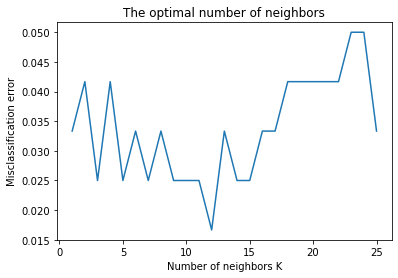

In [28]:
plt.title('The optimal number of neighbors')
plt.xlabel('Number of neighbors K')
plt.ylabel('Misclassification error')
plt.plot(k_range, MSE)
plt.show()


In [45]:
maximum = max(scores, key=scores.get)
print("Maximum value:",maximum)

Maximum value: 12


In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(p_train,q_train)
y_pred = knn.predict(p_test)
metrics.confusion_matrix(q_test,y_pred)
metrics.accuracy_score(q_test,y_pred)

0.9666666666666667